In [1]:
# 라이브러리 import
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from dateutil.relativedelta import relativedelta
from matplotlib.transforms import Bbox, TransformedBbox, blended_transform_factory
from mpl_toolkits.axes_grid1.inset_locator import BboxPatch, BboxConnector,\
    BboxConnectorPatch

In [2]:
plt.rcParams['axes.unicode_minus']= False
if platform.system() == 'Darwin': #맥os 사용자의 경우
    plt.style.use('seaborn-whitegrid')
    rc('font', family = 'AppleGothic')

In [3]:
# 파일 로드
건축허가현황 = pd.read_csv('./data/건축허가현황.csv')
국내건설수주액 = pd.read_csv('./data/국내건설수주액.csv')
아파트실거래가격지수 = pd.read_csv('./data/아파트 실거래가격지수.csv')
주택건설인허가실적 = pd.read_csv('./data/주택건설인허가실적.csv')
주택월세통합가격지수 = pd.read_csv('./data/유형별_주택월세통합가격지수.csv')
주택매매가격지수 = pd.read_csv('./data/주택매매가격지수(KB).csv')
주택전세가격지수 = pd.read_csv('./data/주택전세가격지수(KB).csv')
역대대통령 = pd.read_csv('./data/역대성향별정권.csv')

In [4]:
역대대통령['년월'] = 역대대통령['년월'].apply(lambda x : datetime.strptime(x,'%Y.%m.%d'))
역대대통령['년월'] = 역대대통령['년월'].astype(str)
역대대통령['년월'] = 역대대통령['년월'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
사용할대통령 = ['노무현','이명박','박근혜','문재인']
역대대통령 = 역대대통령.query('대통령이름 in @사용할대통령')
역대대통령 = 역대대통령.reset_index(drop=False)

In [5]:
주택매매가격지수.columns
주택매매가격지수['Unnamed: 0'] = 주택매매가격지수['Unnamed: 0'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
주택매매가격지수.rename(columns={"Unnamed: 0" :'년월' },inplace=True)
대통령과주택매매가격지수df = pd.merge(역대대통령,주택매매가격지수)
대통령과주택매매가격지수df = 대통령과주택매매가격지수df.melt(id_vars=대통령과주택매매가격지수df.columns[:3],value_vars=대통령과주택매매가격지수df.columns[3:],
                 var_name='구분',value_name = '값')
대통령과주택매매가격지수df['구분'] = 대통령과주택매매가격지수df['구분'].apply(lambda x : x.replace("[2019.01=100]",""))

In [6]:
건축허가현황.columns
#건축허가현황에서는 정권에 따른 주거,상업,공업용 건축허가 면적을 비교함
#'연면적-주거용[㎡]', '연면적-상업용[㎡]', '연면적-공업용[㎡]'

Index(['Unnamed: 0', '연면적-철근·철골조[㎡]', '연면적-조적조[㎡]', '연면적-목조[㎡]',
       '연면적-기타(자재별)[㎡]', '연면적-주거용[㎡]', '연면적-상업용[㎡]', '연면적-공업용[㎡]',
       '연면적-교육및사회용[㎡]', '연면적-기타(용도별)[㎡]', '연면적-자재별[㎡]', '연면적-용도별[㎡]',
       '동수-철근·철골조[동수]', '동수-조적조[동수]', '동수-목조[동수]', '동수-기타(자재별)[동수]',
       '동수-주거용[동수]', '동수-상업용[동수]', '동수-공업용[동수]', '동수-교육및사회용[동수]',
       '동수-기타(용도별)[동수]', '동수-자재별[동수]', '동수-용도별[동수]'],
      dtype='object')

In [7]:
국내건설수주액.columns

Index(['Unnamed: 0', '총수주액[백만원]', '공공부문[백만원]', '중앙정부[백만원]', '지방자치단체[백만원]',
       '공기업[백만원]', '기타공공단체[백만원]', '민간부문[백만원]', '제조업[백만원]', '비제조업[백만원]',
       '국내외국기관[백만원]', '민자[백만원]', '건축[백만원]', '주택[백만원]', '사무실 및 점포[백만원]',
       '공장 및 창고[백만원]', '관공서[백만원]', '기타[백만원]', '토목[백만원]', '치산 및 치수[백만원]',
       '농림 및 수산[백만원]', '도로 및 교량[백만원]', '항만 및 공항[백만원]', '철도 및 궤도[백만원]',
       '상하수도[백만원]', '발전 및 송전[백만원]', '토지조성[백만원]', '댐[백만원]', '기계설치[백만원]',
       '기타[백만원].1', '조경공사[백만원]'],
      dtype='object')

In [8]:
#총수주액 = 공공부문 + 민간부문
#총수주액 = 건축 + 토목
#공공부문 = 중앙정부 + 지방자치단체 + 공기업 + 기타공공단체
#민간부문 = 제조업 + 비제조업 + 국내외국기업
#건축 = 주택 + 사무실 및 점포 + 공장 및 창고 + 관공서 + 기타
#토목 = 치산 및 치수 + 농림 및 수산 + 도로 및 교량 + 항망 및 공 + 철도 및 궤도 + 상하수도 + 조경공사 + 발전 및 송전 + 토지조성 + 댐 + 기계설치 + 기타 + 조경공사

In [9]:
국내건설수주액['Unnamed: 0'] = 국내건설수주액['Unnamed: 0'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
국내건설수주액.rename(columns={"Unnamed: 0" :'년월' },inplace=True)
대통령과수주액df = pd.merge(역대대통령,국내건설수주액)
대통령과수주액df = 대통령과수주액df.melt(id_vars=대통령과수주액df.columns[:3],value_vars=대통령과수주액df.columns[3:],
                 var_name='구분',value_name = '값')
대통령과수주액df['구분'] = 대통령과수주액df['구분'].apply(lambda x : x.replace("[백만원]",""))

In [10]:
presidents_inaug_dates = {
    '노무현' : '2003-03-01',
    '이명박' : '2008-03-01',
    '박근혜' : '2013-03-01',
    '문재인' : '2017-05-01'
}

In [11]:
총수주액1 = ['공공부문', '민간부문']
총수주액2 = ['건축','토목']
공공부문수주액 = ['중앙정부','지방자치단체','공기업','기타공공단체']
민간부문수주액 = ['제조업','비제조업','국내외국기업']
건축수주액 = ['주택' ,'사무실 및 점포' ,'공장 및 창고' , '관공서' ,'기타']
토목수주액 = ['치산 및 치수', '농림 및 수산', '도로 및 교량', '항망 및 공항', '철도 및 궤도','상하수도','조경공사','발전 및 송전','토지조성','댐','기계설치', '기타', '조경공사']
전국매매지수 = ['단독주택','연립주택','아파트']
서울매매지수 = ['아파트(서울)']

In [17]:
def presidentline(presidents_inaug_dates, max_value):
    for president, inaug_date in presidents_inaug_dates.items():
        if president == '박근혜' or president == '문재인':
            y = 2
            m = 4
        else:
            y = 2
            m = 5
        inaug_date = datetime.strptime(inaug_date, '%Y-%m-%d')
        plt.axvline(inaug_date, linestyle='--', color = 'black')
        plt.text(inaug_date +relativedelta(years=y, month=m), y = max_value, s = president, fontsize=11)

def lineplot_presidentline(df,리스트):
    temp_df = df.query('구분 in @ 리스트')
    max_value = temp_df['값'].max() *0.95
    sns.lineplot(data=temp_df,x='년월',y=f'값',hue='구분')
    plt.title(f'총계',fontsize=20,fontweight='bold')
    plt.legend(loc = 'upper left', bbox_to_anchor=(0.05,0.9))
    presidentline(presidents_inaug_dates,max_value)

def lineplot(df,리스트,title):
    temp_df = df.query('구분 in @ 리스트')
    max_value = temp_df['값'].max() *0.95
    sns.lineplot(data=temp_df,x='년월',y=f'값',hue='구분')
    plt.title(f'{title} 상세',fontsize=15,fontweight='bold')
    plt.xticks(rotation=45)

In [18]:
def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = prop_lines.copy()
        prop_patches["alpha"] = prop_patches.get("alpha", 1)*0.1

    c1 = BboxConnector(bbox1, bbox2, loc1=loc1a, loc2=loc2a, **prop_lines)
    c1.set_clip_on(False)
    c2 = BboxConnector(bbox1, bbox2, loc1=loc1b, loc2=loc2b, **prop_lines)
    c2.set_clip_on(False)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           **prop_patches)
    p.set_clip_on(False)

    return c1, c2, bbox_patch1, bbox_patch2, p


In [19]:
def zoom_effect02(ax1, ax2, **kwargs):
    """
    ax2 : the big main axes
    ax1 : the zoomed axes
    The xmin & xmax will be taken from the
    ax1.viewLim.
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(ax2.transData, tt)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=2, loc2a=3, loc1b=1, loc2b=4,
                     prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


In [20]:
def triple_grap(df,main,sub):
    plt.figure(figsize=(15,10))
    ax1 = plt.subplot(2,1,1)
    lineplot_presidentline(df, [f'{main}'])
    ax2 = plt.subplot(2,2,3)
    lineplot(df.query(f'"2008-03-01" <= 년월 < "2013-03-01"'), sub, '이명박임기')
    zoom_effect02(ax2, ax1)
    ax3 = plt.subplot(2,2,4)
    lineplot(df.query(f'"2017-05-01" <= 년월'),sub,'문재인임기')
    zoom_effect02(ax3, ax1)
    plt.show()

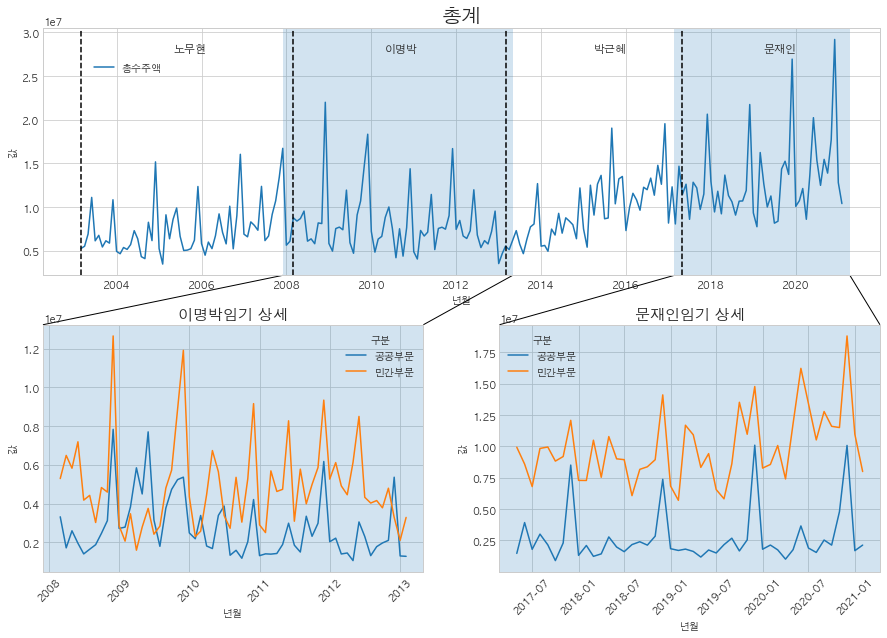

In [21]:
triple_grap(df = 대통령과수주액df,main="총수주액",sub =총수주액1)

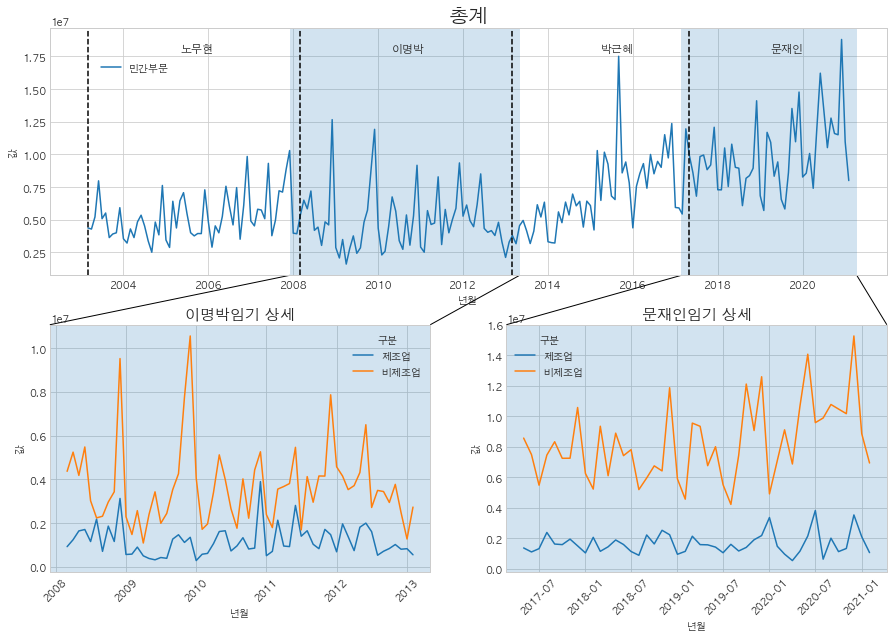

In [22]:
triple_grap(df = 대통령과수주액df,main="민간부문",sub =민간부문수주액)

In [ ]:
triple_grap(df = 대통령과수주액df,main="공공부문",sub =공공부문수주액)

In [ ]:
triple_grap(df = 대통령과수주액df,main="총수주액",sub =총수주액2)

In [ ]:
triple_grap(df = 대통령과수주액df,main="건축",sub =건축수주액)

In [ ]:
triple_grap(df = 대통령과수주액df,main="토목",sub =토목수주액)

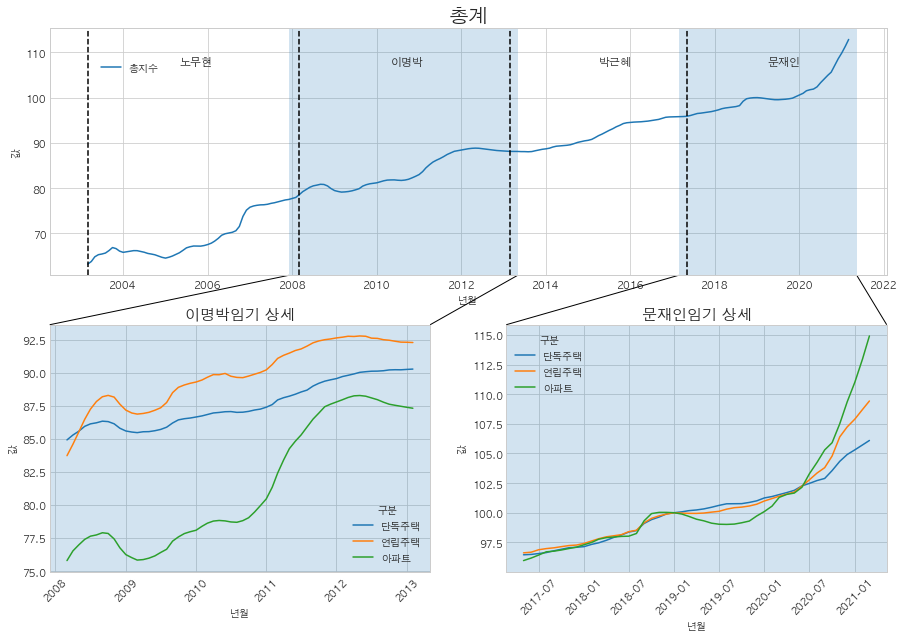

In [23]:
triple_grap(df = 대통령과주택매매가격지수df,main="총지수",sub =전국매매지수)

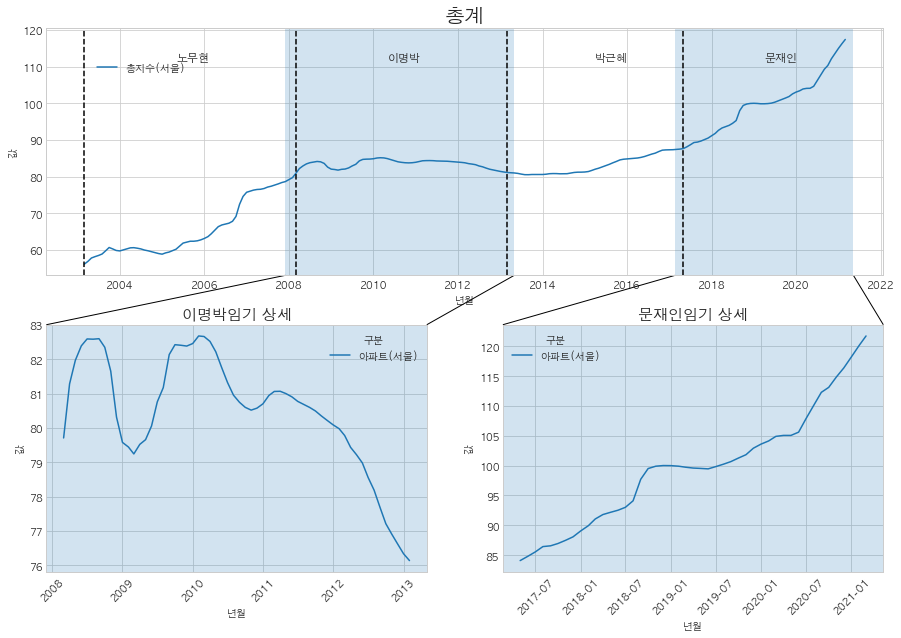

In [25]:
triple_grap(df = 대통령과주택매매가격지수df,main="총지수(서울)",sub =서울매매지수)